## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from scipy.stats import pearsonr
from sklearn.metrics import explained_variance_score
warnings.filterwarnings("ignore")
%matplotlib inline


## Importing the dataset

In [3]:
data = pd.read_csv('data.csv')


In [4]:
data.head()

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,17314.10313
1,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,17542.03608
2,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,16218.84786
3,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,16336.91314
4,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,16339.17032


In [5]:
data.describe()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881,21343.143767
std,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355,9884.852801
min,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000,8638.930895
25%,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000,14273.073875
50%,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000,18024.995020
75%,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000,26717.316635
max,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000,70755.466720


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mileage   804 non-null    int64  
 1   Make      804 non-null    object 
 2   Model     804 non-null    object 
 3   Trim      804 non-null    object 
 4   Type      804 non-null    object 
 5   Cylinder  804 non-null    int64  
 6   Liter     804 non-null    float64
 7   Doors     804 non-null    int64  
 8   Cruise    804 non-null    int64  
 9   Sound     804 non-null    int64  
 10  Leather   804 non-null    int64  
 11  Price     804 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
data.shape

(804, 12)

In [8]:
data.dtypes

Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
Price       float64
dtype: object

In [9]:
data.isnull().values.any()

False

In [10]:
data.isnull().sum()

Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
Price       0
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.head()

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,17314.10313
1,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,17542.03608
2,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,16218.84786
3,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,16336.91314
4,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,16339.17032


In [13]:
data.var()

Mileage     6.717966e+07
Cylinder    1.925243e+00
Liter       1.222267e+00
Doors       7.227871e-01
Cruise      1.864820e-01
Sound       2.181930e-01
Leather     2.001264e-01
Price       9.771031e+07
dtype: float64

## Encoding categorical data

In [14]:
list_1=list(data.columns)

In [15]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [17]:
print(data)

     Mileage  Make  Model  Trim  Type  Cylinder  Liter  Doors  Cruise  Sound  \
0       8221     0     10    44     3         6    3.1      4       1      1   
1       9135     0     10    44     3         6    3.1      4       1      1   
2      13196     0     10    44     3         6    3.1      4       1      1   
3      16342     0     10    44     3         6    3.1      4       1      0   
4      19832     0     10    44     3         6    3.1      4       1      0   
..       ...   ...    ...   ...   ...       ...    ...    ...     ...    ...   
799    16229     5     21    21     3         6    3.0      4       1      0   
800    19095     5     21    21     3         6    3.0      4       1      1   
801    20484     5     21    21     3         6    3.0      4       1      1   
802    25979     5     21    21     3         6    3.0      4       1      1   
803    35662     5     21    21     3         6    3.0      4       1      0   

     Leather        Price  
0          

In [24]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [25]:
print(X)

     Mileage  Make  Model  Trim  Type  Cylinder  Liter  Doors  Cruise  Sound  \
0       8221     0     10    44     3         6    3.1      4       1      1   
1       9135     0     10    44     3         6    3.1      4       1      1   
2      13196     0     10    44     3         6    3.1      4       1      1   
3      16342     0     10    44     3         6    3.1      4       1      0   
4      19832     0     10    44     3         6    3.1      4       1      0   
..       ...   ...    ...   ...   ...       ...    ...    ...     ...    ...   
799    16229     5     21    21     3         6    3.0      4       1      0   
800    19095     5     21    21     3         6    3.0      4       1      1   
801    20484     5     21    21     3         6    3.0      4       1      1   
802    25979     5     21    21     3         6    3.0      4       1      1   
803    35662     5     21    21     3         6    3.0      4       1      0   

     Leather  
0          1  
1        

***feature correlations***

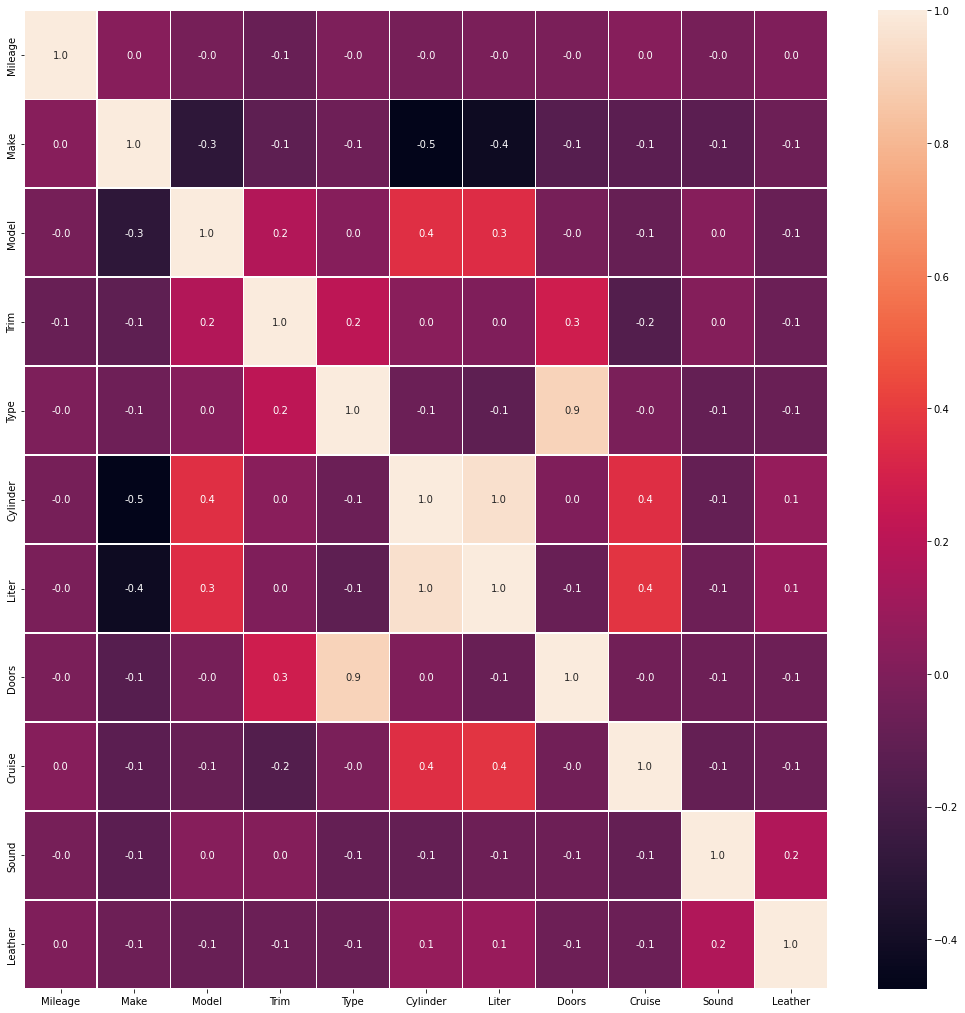

In [26]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

***Correlation between features and target***

In [27]:
features = data.iloc[:, :-1].columns.tolist()
target = data.iloc[:, -1].name

In [28]:
print(features)

['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [32]:
print(target)

Price


In [30]:
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [33]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
Cylinder vs Price,0.569086
Liter vs Price,0.558146
Cruise vs Price,0.430851
Trim vs Price,-0.203280
Type vs Price,-0.163871
Leather vs Price,0.157197
Mileage vs Price,-0.143051
Doors vs Price,-0.138750
Make vs Price,-0.131644
Sound vs Price,-0.124348


## Splitting the dataset into the Training set and Test set

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set & Model Performance

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[24483.83 14862.09]
 [22058.74 16256.24]
 [ 9777.19 15802.65]
 [31068.72 45061.95]
 [14813.53 12425.39]
 [23912.65 25618.28]
 [ 9969.02 15174.35]
 [19532.37 26012.37]
 [22182.13 33005.78]
 [36525.15 70755.47]
 [13366.56 13811.16]
 [24959.92 20839.15]
 [23504.99 19774.25]
 [25479.28 32746.13]
 [22132.64 25959.12]
 [21815.29 15724.25]
 [21868.34 24852.5 ]
 [27239.95 22004.93]
 [27278.83 20676.17]
 [ 7435.2  14398.92]
 [10406.32 10354.04]
 [15324.59 13106.9 ]
 [27350.86 19204.81]
 [22693.91 21562.05]
 [22128.08 20406.1 ]
 [25002.02 17768.06]
 [21245.41 26698.08]
 [21745.54 16345.94]
 [29607.77 19682.04]
 [15566.61 11472.02]
 [ 9766.1  10770.11]
 [13865.69 11615.02]
 [33681.64 43892.47]
 [22614.41 31002.73]
 [23421.07 20017.97]
 [17692.59 25508.21]
 [21475.53 18957.89]
 [26062.65 17202.83]
 [33814.36 35129.34]
 [21462.42 23547.24]
 [15756.75 11318.01]
 [22206.71 19446.88]
 [18543.69 31970.54]
 [22897.62 16300.47]
 [23368.39 19294.79]
 [14477.28 11464.63]
 [28021.78 20698.08]
 [14842.22 14

In [ ]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)

0.4306685774802236

## Training the Random Forest Regression model on the Training set & Model Performance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
  y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[15897.47 14862.09]
 [16470.36 16256.24]
 [15758.25 15802.65]
 [39906.74 45061.95]
 [12206.31 12425.39]
 [27026.8  25618.28]
 [15041.87 15174.35]
 [26306.4  26012.37]
 [31843.89 33005.78]
 [68517.26 70755.47]
 [13836.18 13811.16]
 [20552.04 20839.15]
 [20316.35 19774.25]
 [32252.02 32746.13]
 [27499.16 25959.12]
 [16196.44 15724.25]
 [25902.12 24852.5 ]
 [21538.2  22004.93]
 [20468.91 20676.17]
 [15690.18 14398.92]
 [10166.38 10354.04]
 [12778.96 13106.9 ]
 [17950.32 19204.81]
 [20639.29 21562.05]
 [21131.61 20406.1 ]
 [19036.92 17768.06]
 [27583.71 26698.08]
 [16868.39 16345.94]
 [21927.84 19682.04]
 [10977.92 11472.02]
 [11108.26 10770.11]
 [11189.98 11615.02]
 [43954.46 43892.47]
 [30999.05 31002.73]
 [18989.99 20017.97]
 [25082.03 25508.21]
 [19130.16 18957.89]
 [17871.16 17202.83]
 [36601.85 35129.34]
 [21205.31 23547.24]
 [12149.88 11318.01]
 [19108.94 19446.88]
 [33380.94 31970.54]
 [15897.18 16300.47]
 [17803.11 19294.79]
 [11758.67 11464.63]
 [20587.58 20698.08]
 [13841.86 14

In [ ]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)

0.9870591949254662